In [123]:
import pandas as pd
#파일 불러오기  
read=pd.read_csv('/home/hyuksu/projects/ml/project/데이터/FIN_DATA_v1.csv',encoding='utf-8')
read

,Unnamed: 0,DATE_YM,STATES,SIZE,PRICE_MEDIAN,COUNTS,CPI,BASE_RATE,CPI_YOY,REAL_RATE,HOUSE_RATE,VARIABLED
0,0,201504,강남구,대형,128750.0,246,94.625,1.730,0.436241,1.293759,2.81,-1.030132
1,1,201505,강남구,대형,133000.0,204,94.890,1.740,0.552088,1.187912,3.06,-0.936000
2,2,201506,강남구,대형,131000.0,183,94.909,1.570,0.701341,0.868659,3.01,-0.992308
3,3,201507,강남구,대형,139250.0,176,95.080,1.480,0.735279,0.744721,2.96,-0.918447
4,4,201508,강남구,대형,135000.0,157,95.213,1.490,0.700151,0.789849,2.94,-0.984962
...,...,...,...,...,...,...,...,...,...,...,...,...
2281,2281,202506,중구,중형,120000.0,86,116.310,2.520,2.169712,0.350288,3.93,-1.040000
2282,2282,202507,중구,중형,115000.0,20,116.520,2.500,2.094103,0.405897,3.96,-1.041667
2283,2283,202508,중구,중형,129000.0,25,116.450,2.506,1.667540,0.838460,3.96,-1.040892
2284,2284,202509,중구,중형,137500.0,69,117.060,2.526,2.102050,0.423950,3.96,-0.854167


In [124]:
#쓸떄없는 열제거
read.drop(columns=['Unnamed: 0'],inplace=True)
read.head(6)

,DATE_YM,STATES,SIZE,PRICE_MEDIAN,COUNTS,CPI,BASE_RATE,CPI_YOY,REAL_RATE,HOUSE_RATE,VARIABLED
0,201504,강남구,대형,128750.0,246,94.625,1.73,0.436241,1.293759,2.81,-1.030132
1,201505,강남구,대형,133000.0,204,94.890,1.74,0.552088,1.187912,3.06,-0.936000
2,201506,강남구,대형,131000.0,183,94.909,1.57,0.701341,0.868659,3.01,-0.992308
3,201507,강남구,대형,139250.0,176,95.080,1.48,0.735279,0.744721,2.96,-0.918447
4,201508,강남구,대형,135000.0,157,95.213,1.49,0.700151,0.789849,2.94,-0.984962
5,201509,강남구,대형,136000.0,166,94.966,1.48,0.503757,0.976243,2.92,-0.961832


In [125]:
#시계열정리

read['DATE_YM']=read['DATE_YM'].sort_values()
read.set_index('DATE_YM',inplace=True)
read

,STATES,SIZE,PRICE_MEDIAN,COUNTS,CPI,BASE_RATE,CPI_YOY,REAL_RATE,HOUSE_RATE,VARIABLED
DATE_YM,,,,,,,,,,
201504,강남구,대형,128750.0,246,94.625,1.730,0.436241,1.293759,2.81,-1.030132
201505,강남구,대형,133000.0,204,94.890,1.740,0.552088,1.187912,3.06,-0.936000
201506,강남구,대형,131000.0,183,94.909,1.570,0.701341,0.868659,3.01,-0.992308
201507,강남구,대형,139250.0,176,95.080,1.480,0.735279,0.744721,2.96,-0.918447
201508,강남구,대형,135000.0,157,95.213,1.490,0.700151,0.789849,2.94,-0.984962
...,...,...,...,...,...,...,...,...,...,...
202506,중구,중형,120000.0,86,116.310,2.520,2.169712,0.350288,3.93,-1.040000
202507,중구,중형,115000.0,20,116.520,2.500,2.094103,0.405897,3.96,-1.041667
202508,중구,중형,129000.0,25,116.450,2.506,1.667540,0.838460,3.96,-1.040892


In [126]:
#이름변경
read.rename(columns={'STATES':'구','PRICE_MEDIAN':'가격','COUNTS':'거래량','BASE_RATE':'기준금리','REAL_RATE':'실질금리','HOUSE_RATE':'주담대금리','VARIABLED':'3달뒤 변화량'},inplace=True)


In [127]:
import pandas as pd
import matplotlib.pyplot as plt



read.reset_index(inplace=True)


date=pd.to_datetime(read['DATE_YM'], format='%Y%m').unique()
date
states=read['구'].unique()
size=read['SIZE'].unique()
print(date,states,size)

<DatetimeArray>
['2015-04-01 00:00:00', '2015-05-01 00:00:00', '2015-06-01 00:00:00',
 '2015-07-01 00:00:00', '2015-08-01 00:00:00', '2015-09-01 00:00:00',
 '2015-10-01 00:00:00', '2015-11-01 00:00:00', '2015-12-01 00:00:00',
 '2016-01-01 00:00:00',
 ...
 '2025-01-01 00:00:00', '2025-02-01 00:00:00', '2025-03-01 00:00:00',
 '2025-04-01 00:00:00', '2025-05-01 00:00:00', '2025-06-01 00:00:00',
 '2025-07-01 00:00:00', '2025-08-01 00:00:00', '2025-09-01 00:00:00',
 '2025-10-01 00:00:00']
Length: 127, dtype: datetime64[ns] ['강남구' '서초구' '송파구' '용산구' '종로구' '중구'] ['대형' '소형' '중형']


In [128]:
read_v1=read.groupby(['DATE_YM','구','SIZE'])[['가격','주담대금리']].median()

read_v1

가격  주담대금리
DATE_YM 구   SIZE                 
201504  강남구 대형    128750.0   2.81
            소형     58150.0   2.81
            중형     85500.0   2.81
        서초구 대형    109250.0   2.81
            소형     57000.0   2.81
...                    ...    ...
202510  종로구 소형     82250.0   3.98
            중형    114750.0   3.98
        중구  대형    160000.0   3.98
            소형     88500.0   3.98
            중형    136000.0   3.98

[2286 rows x 2 columns]

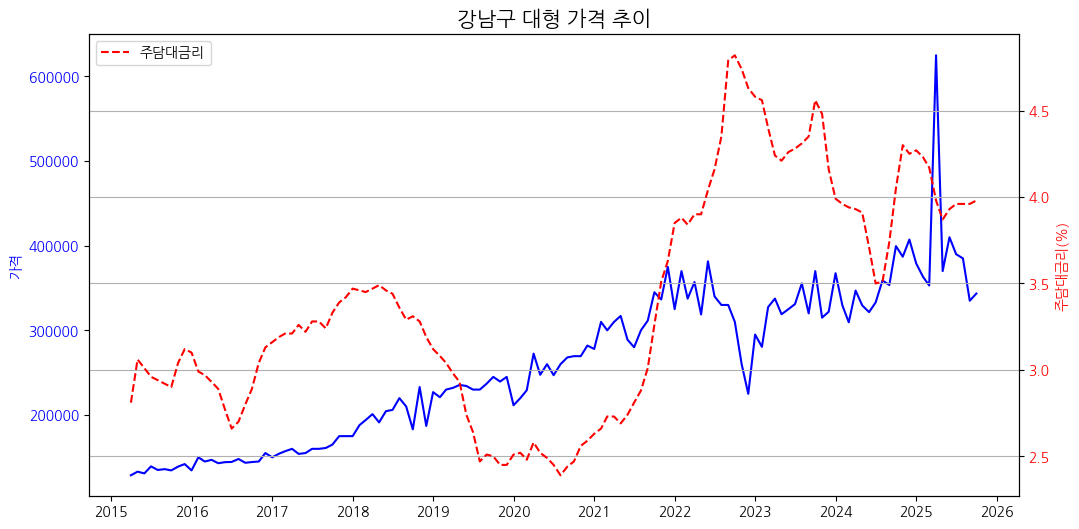

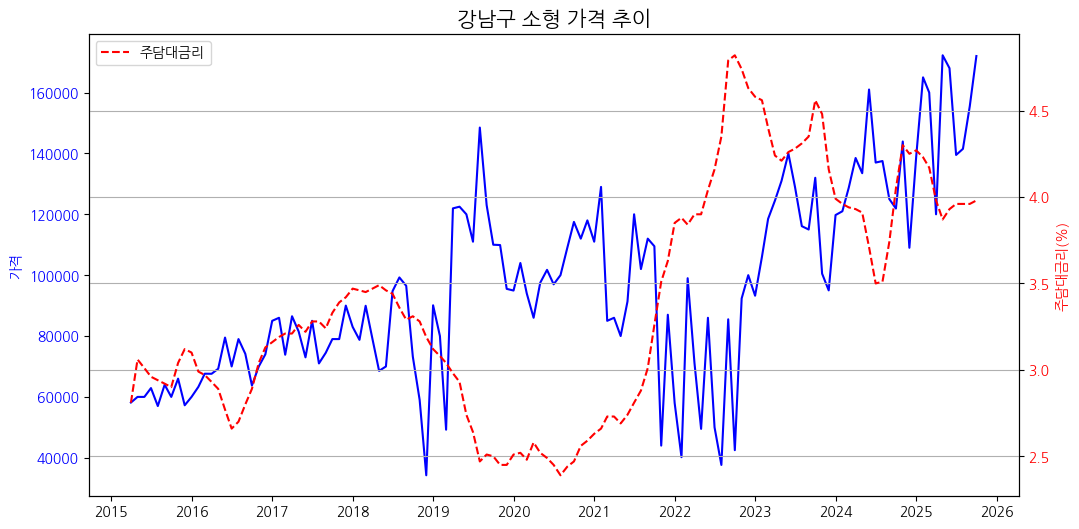

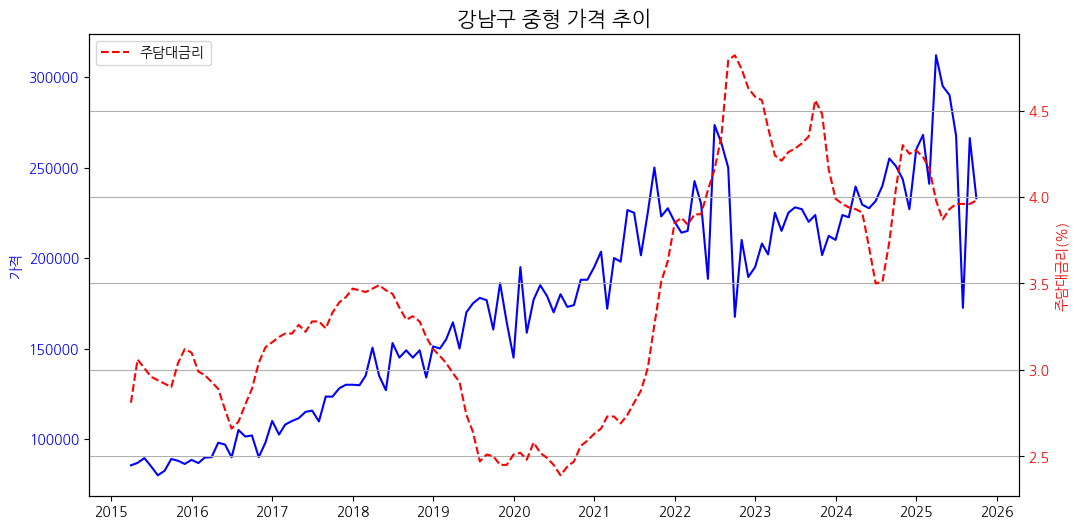

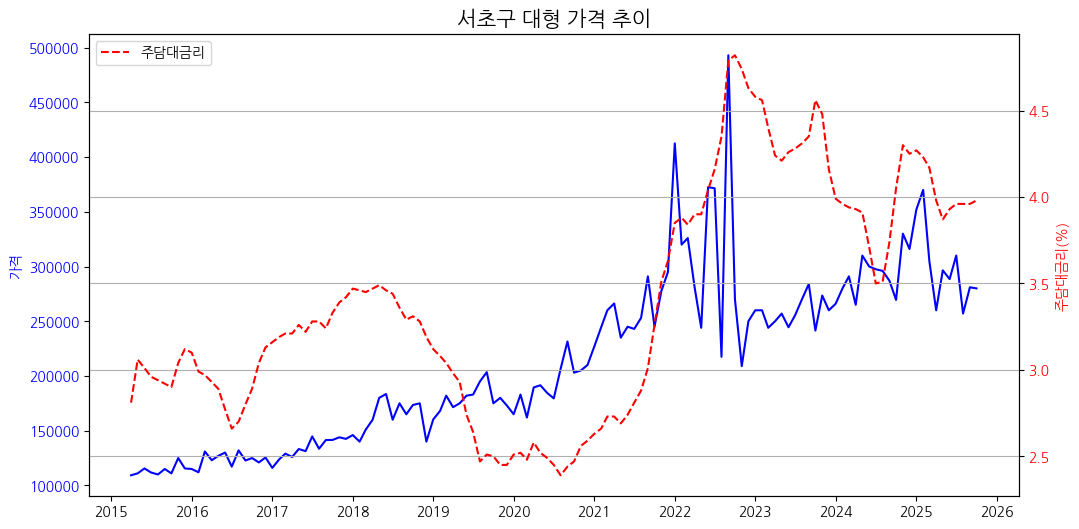

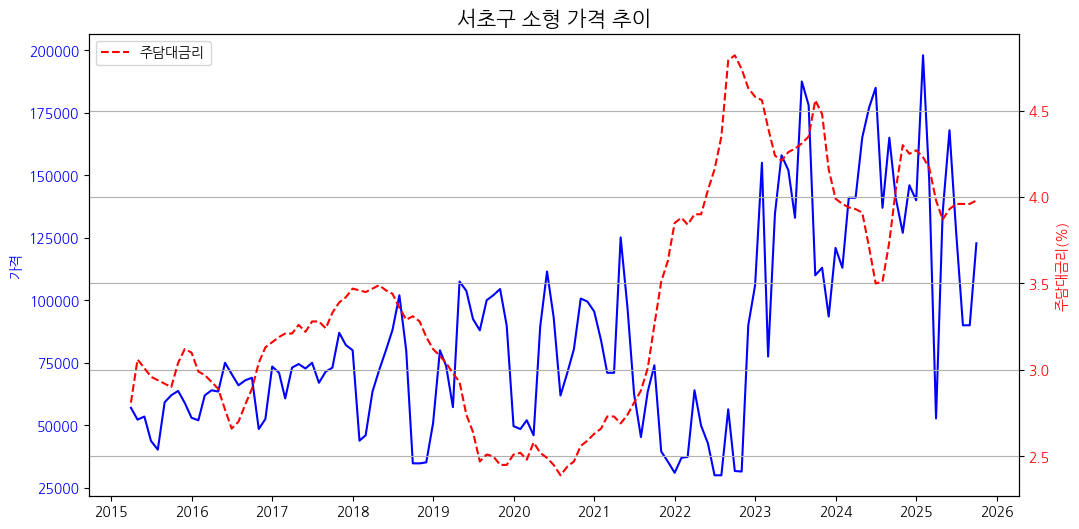

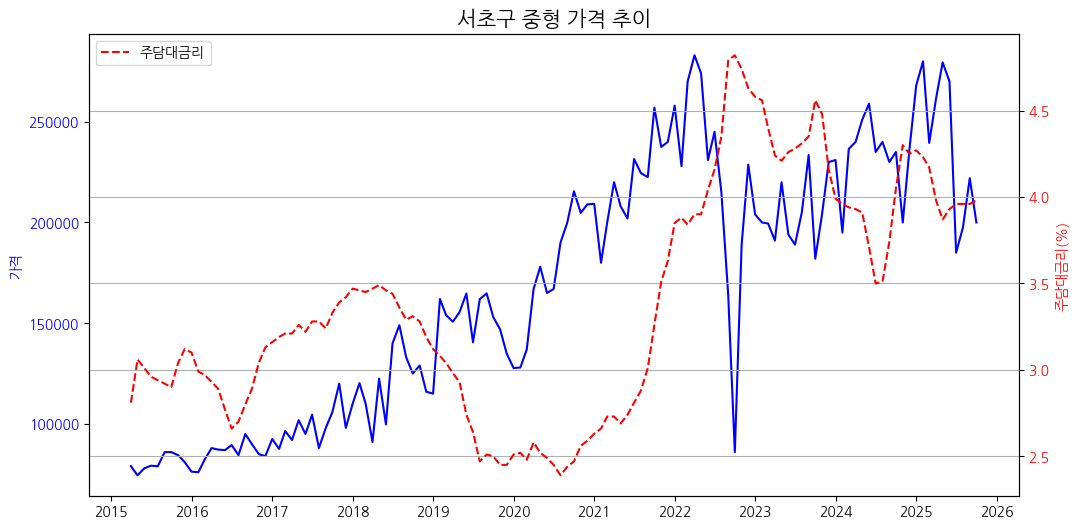

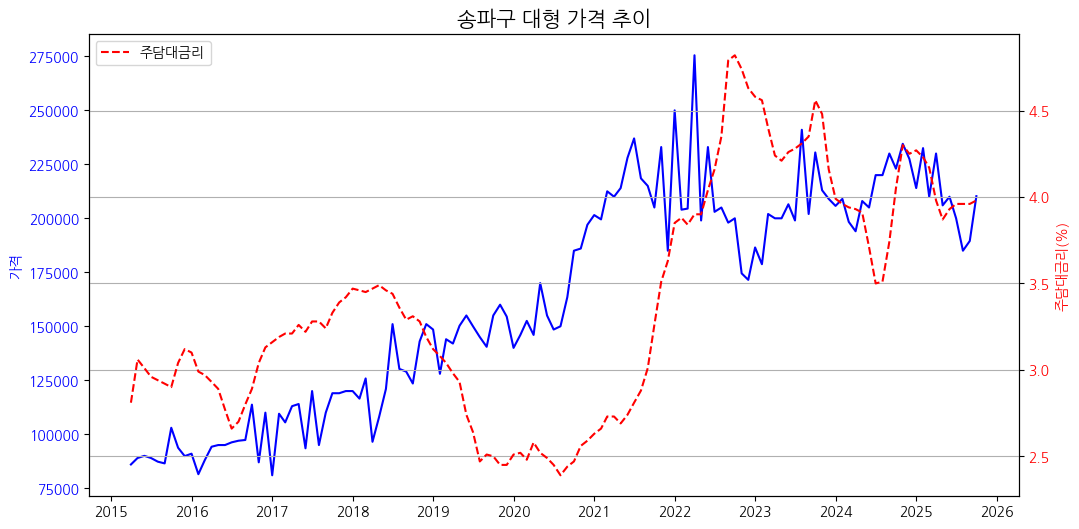

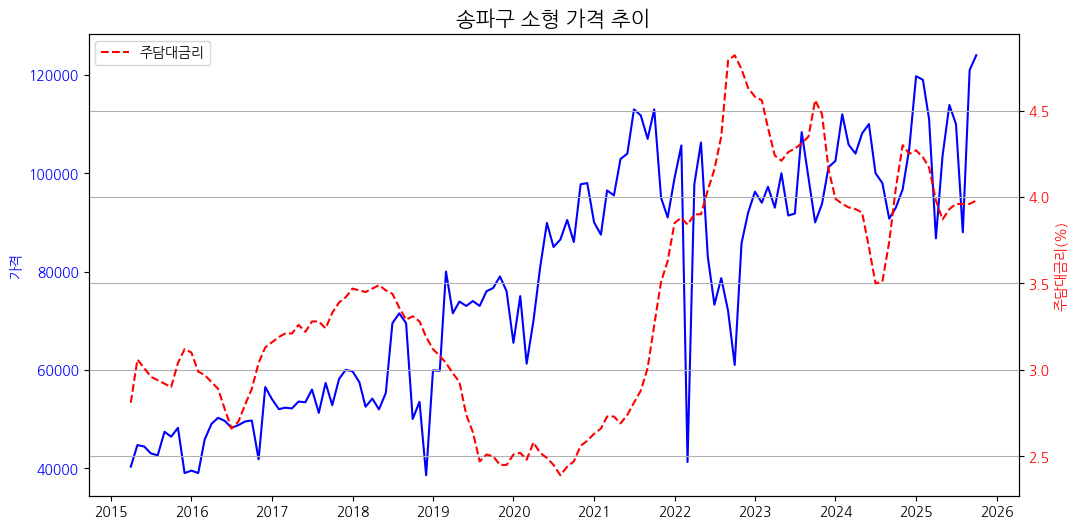

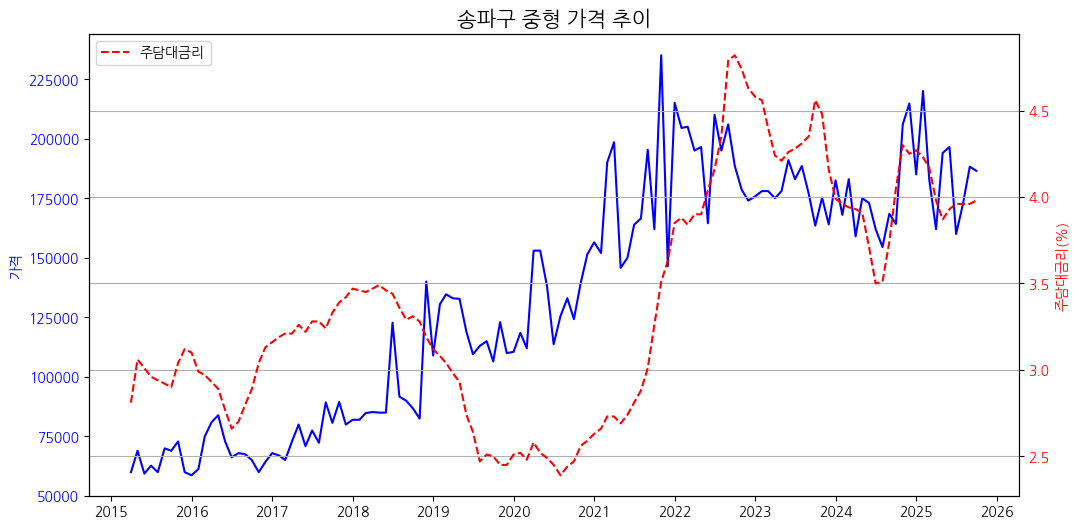

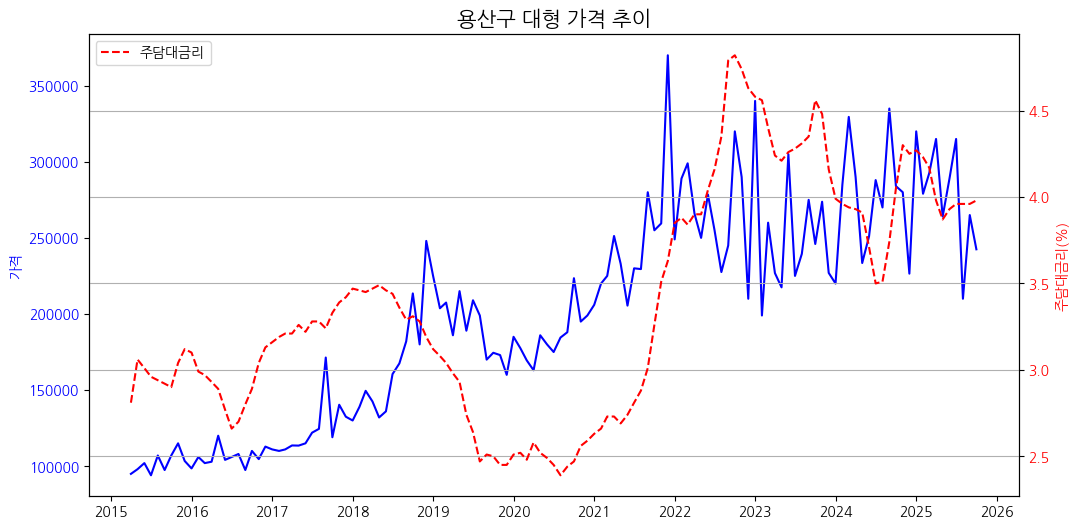

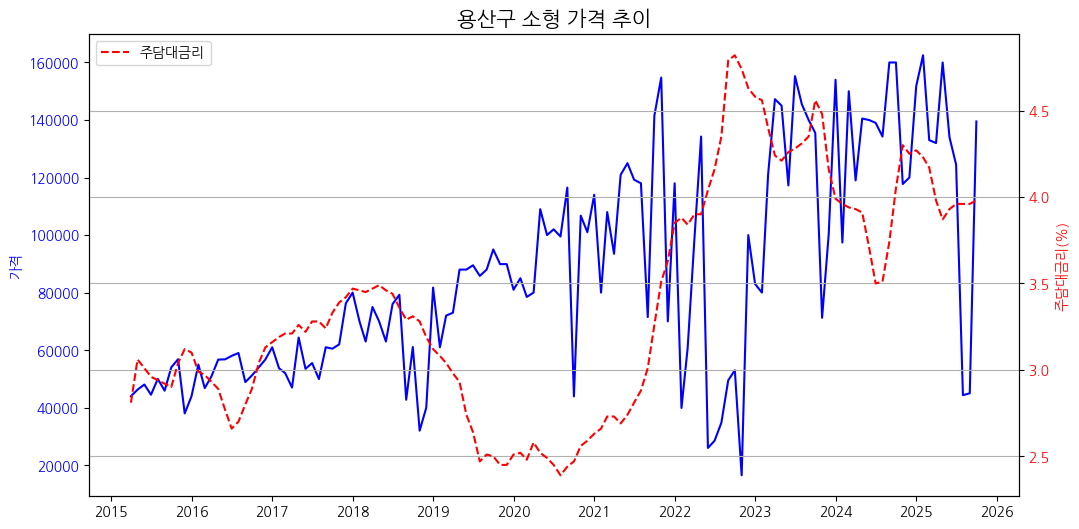

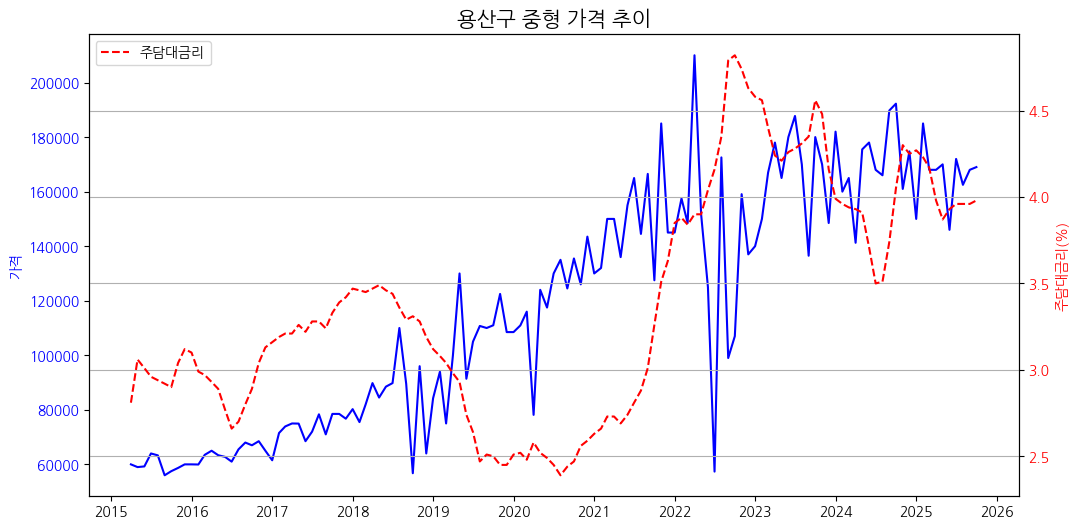

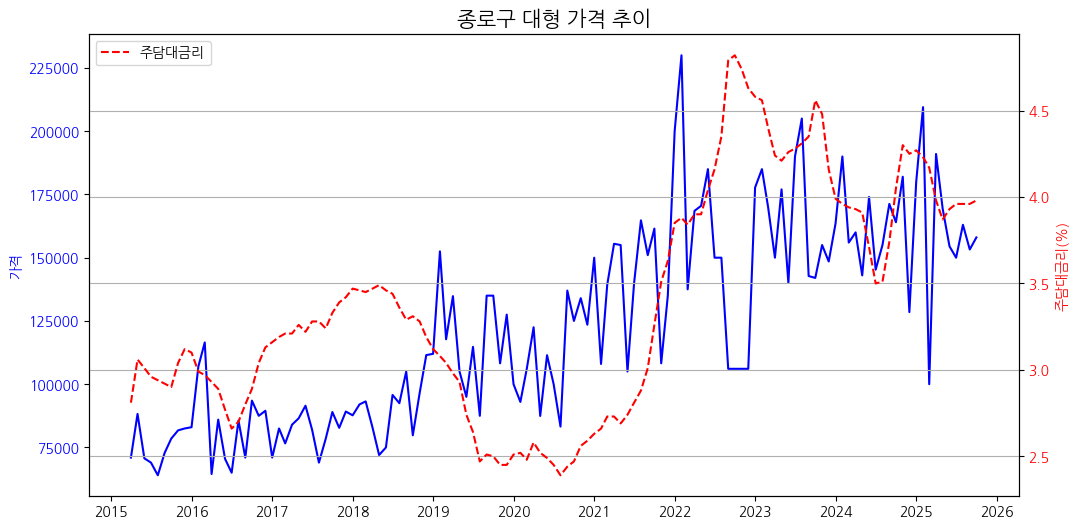

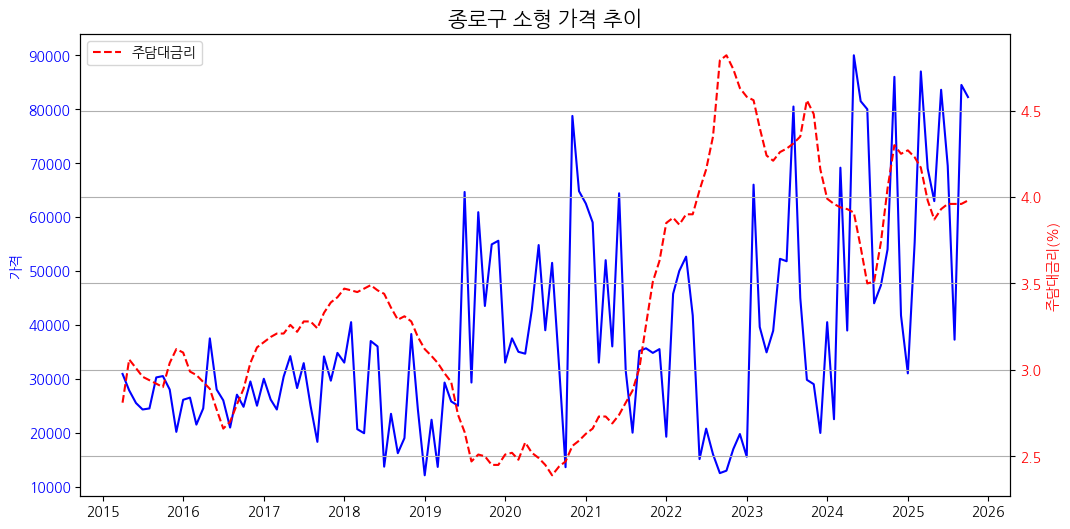

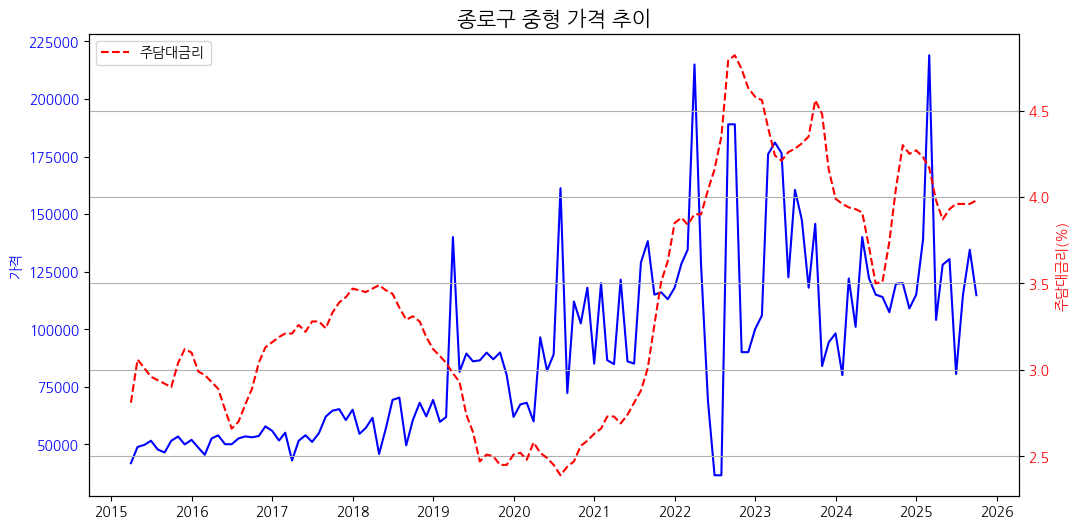

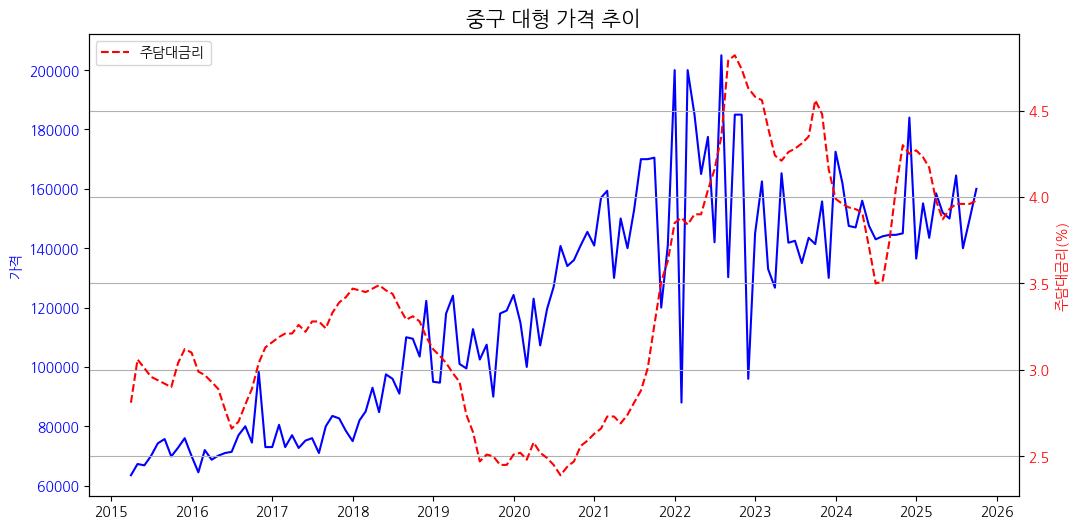

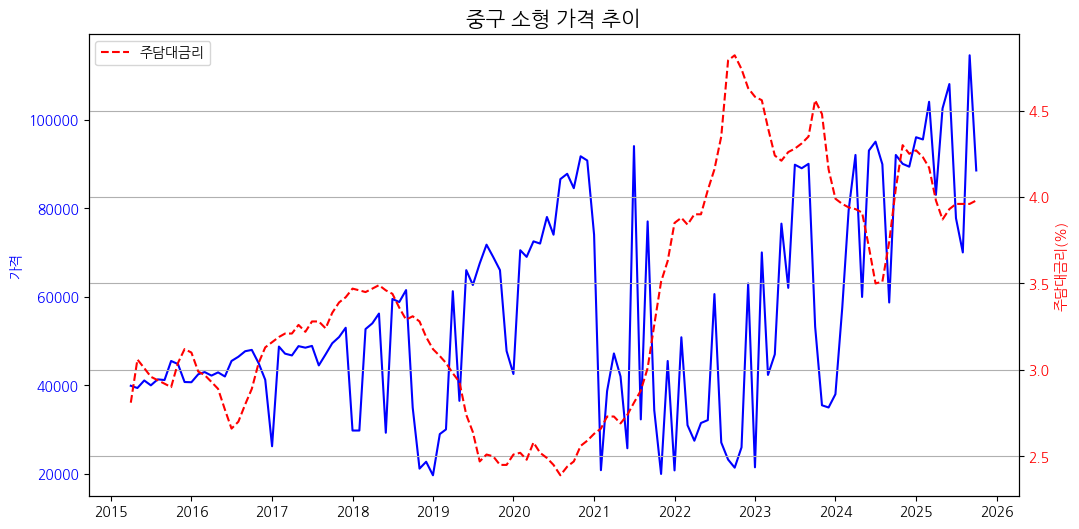

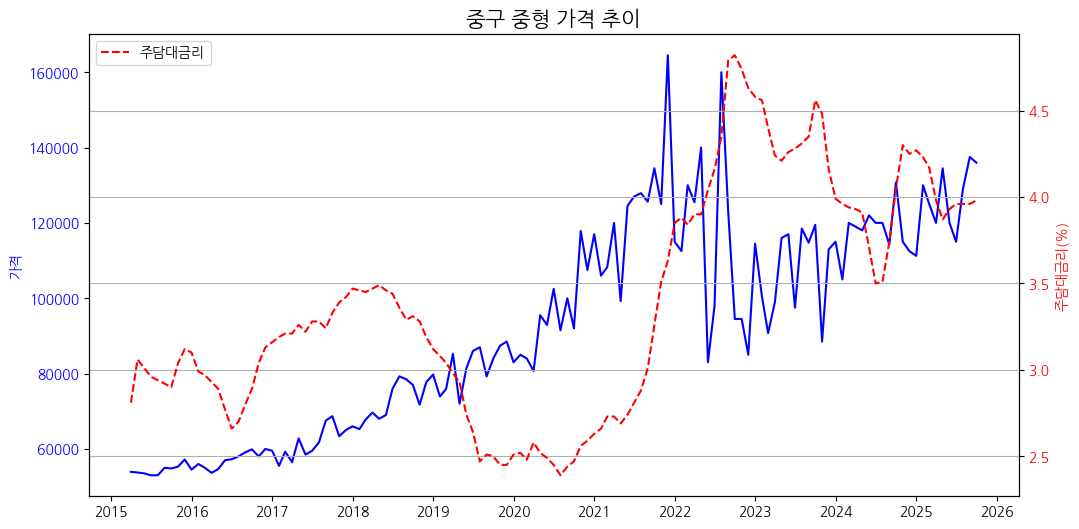

In [134]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

states = read_v1['구'].unique()
sizes  = read_v1['SIZE'].unique()

for STATE in states:
    for SZ in sizes:
        data = read_v1[(read_v1['구']==STATE) & (read_v1['SIZE']==SZ)] \
                    .sort_values('DATE_YM')
        if data.empty:
            continue

        fig, ax = plt.subplots(figsize=(12,6))

        # 왼쪽: 가격
        ax.plot(data['DATE_YM'], data['가격'], color='blue', label='가격')
        ax.set_ylabel('가격', color='blue')
        ax.tick_params(axis='y', labelcolor='blue')

        # 오른쪽: 주담대금리
        ax2 = ax.twinx()
        ax2.plot(data['DATE_YM'], data['주담대금리'],
                 color='red', linestyle='--', label='주담대금리')
        ax2.set_ylabel('주담대금리(%)', color='red')
        ax2.tick_params(axis='y', labelcolor='red')

        # x축 연도
        ax.xaxis.set_major_locator(mdates.YearLocator())
        #title
        plt.title(f'{STATE} {SZ} 가격 추이', fontsize=15)
        plt.legend(loc='upper left')
        plt.grid()
        plt.show()
    

In [129]:
read_v1=read_v1.reset_index()
print(read_v1)

      DATE_YM    구 SIZE        가격  주담대금리
0      201504  강남구   대형  128750.0   2.81
1      201504  강남구   소형   58150.0   2.81
2      201504  강남구   중형   85500.0   2.81
3      201504  서초구   대형  109250.0   2.81
4      201504  서초구   소형   57000.0   2.81
...       ...  ...  ...       ...    ...
2281   202510  종로구   소형   82250.0   3.98
2282   202510  종로구   중형  114750.0   3.98
2283   202510   중구   대형  160000.0   3.98
2284   202510   중구   소형   88500.0   3.98
2285   202510   중구   중형  136000.0   3.98

[2286 rows x 5 columns]


In [130]:
print(read_v1["DATE_YM"].head(5))
print(read_v1["DATE_YM"].dtype)

0    201504
1    201504
2    201504
3    201504
4    201504
Name: DATE_YM, dtype: int64
int64


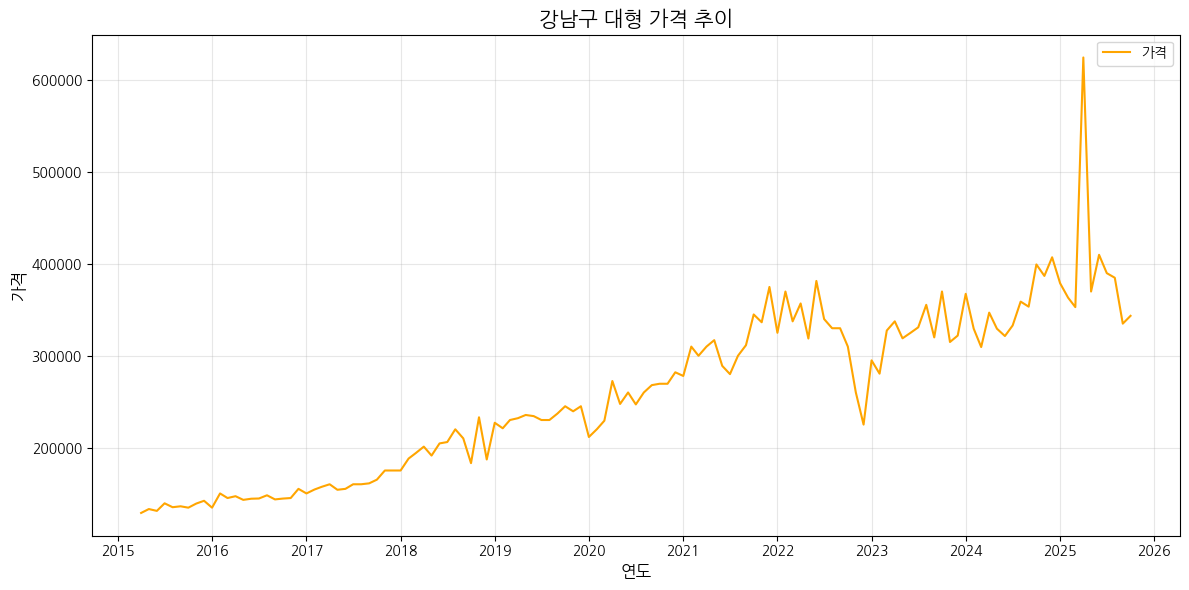

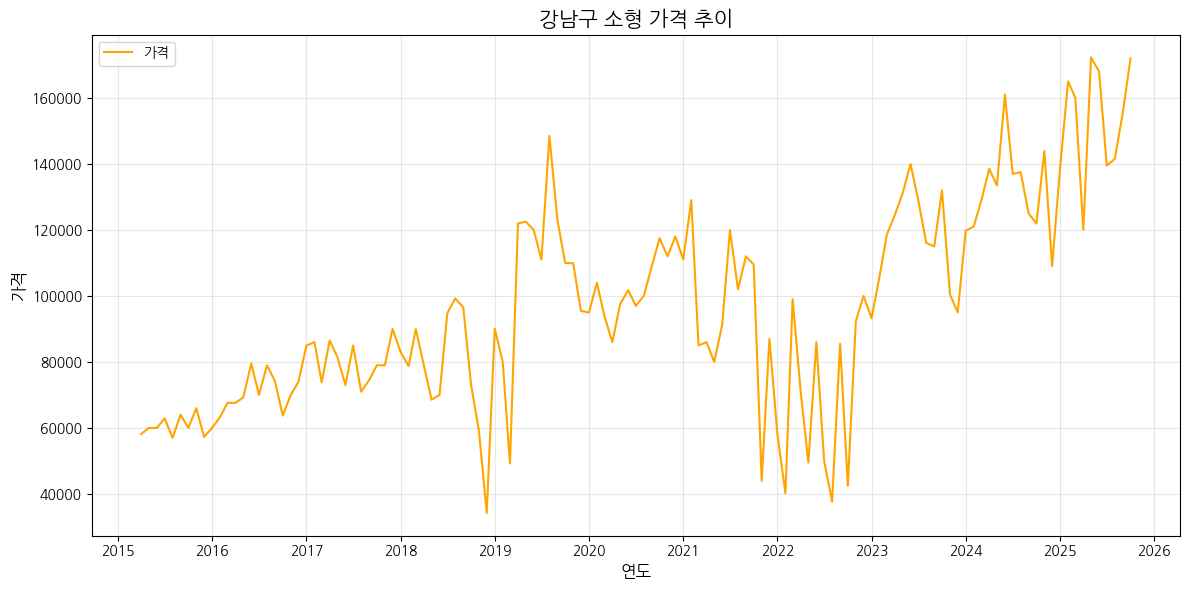

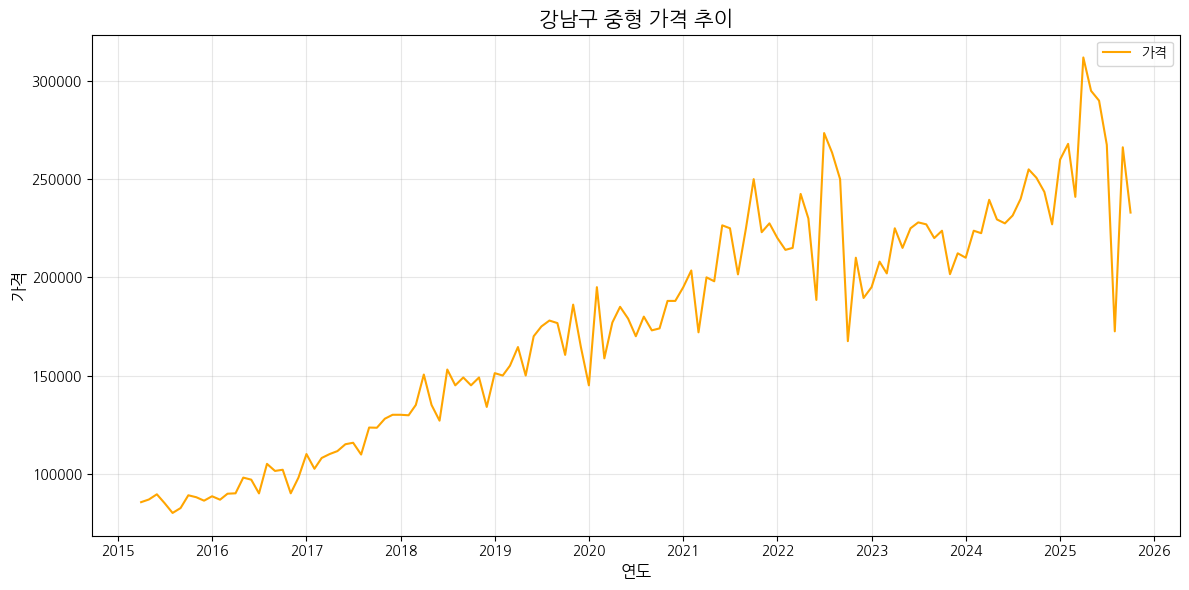

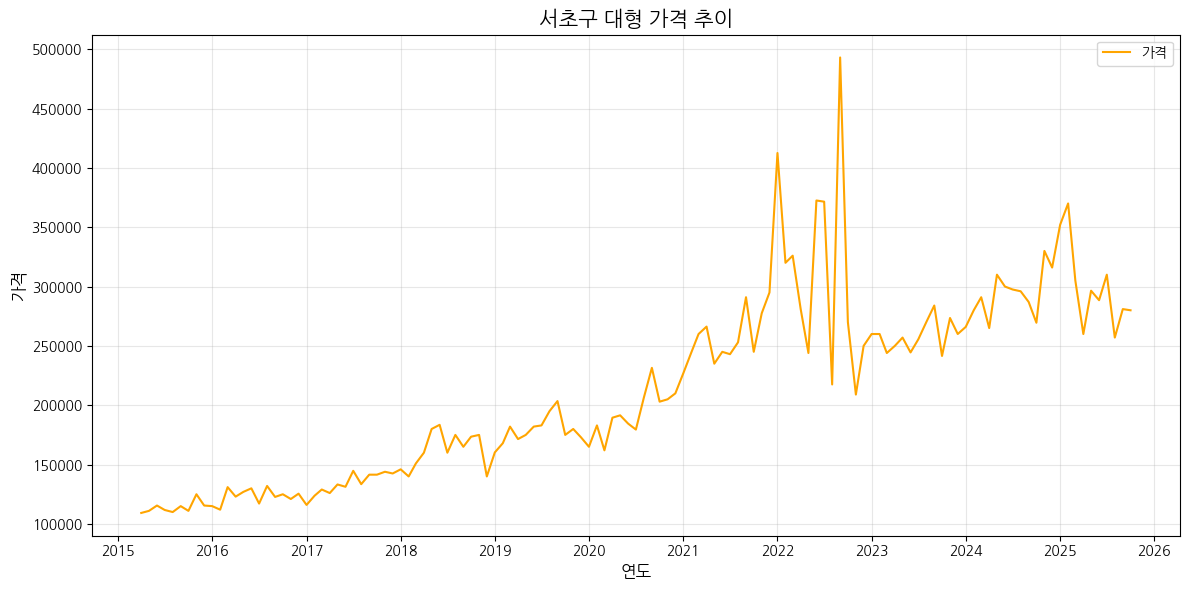

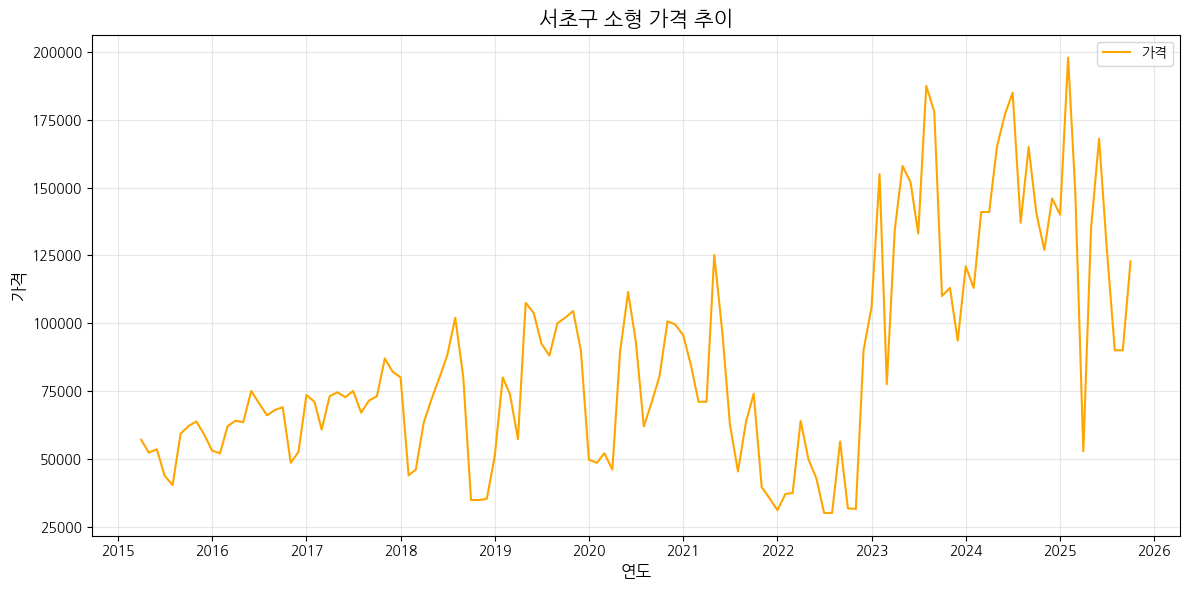

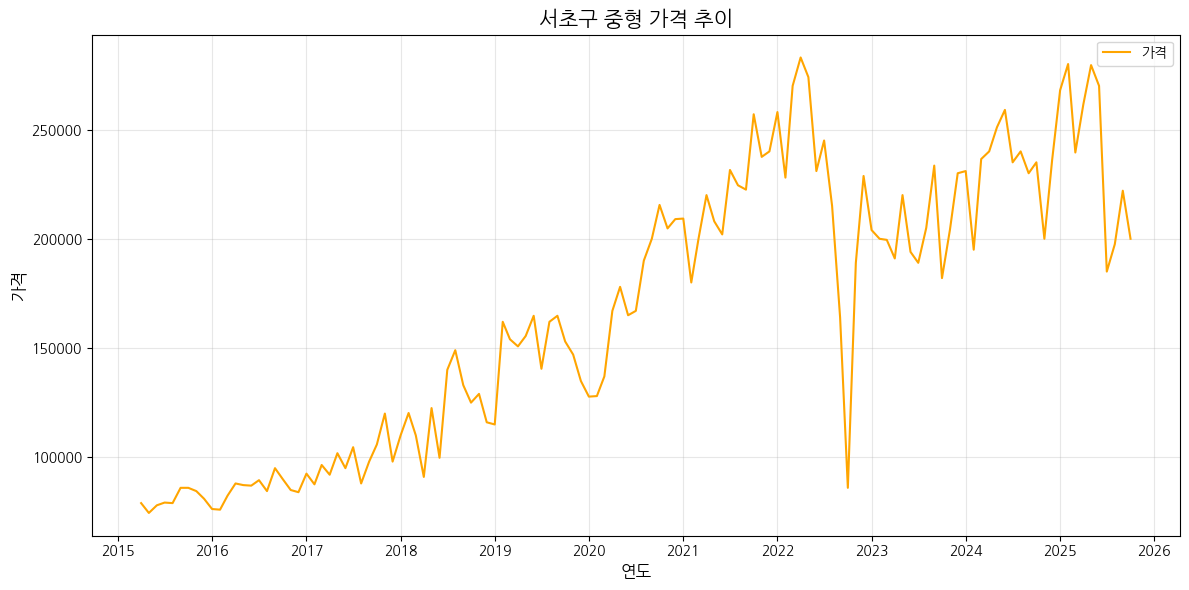

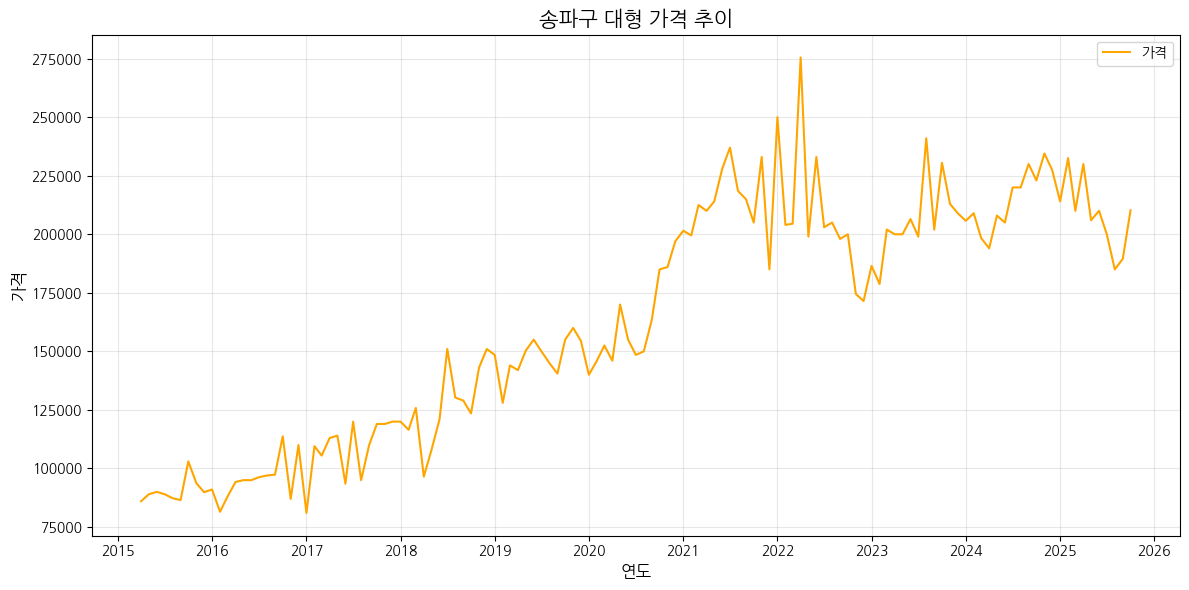

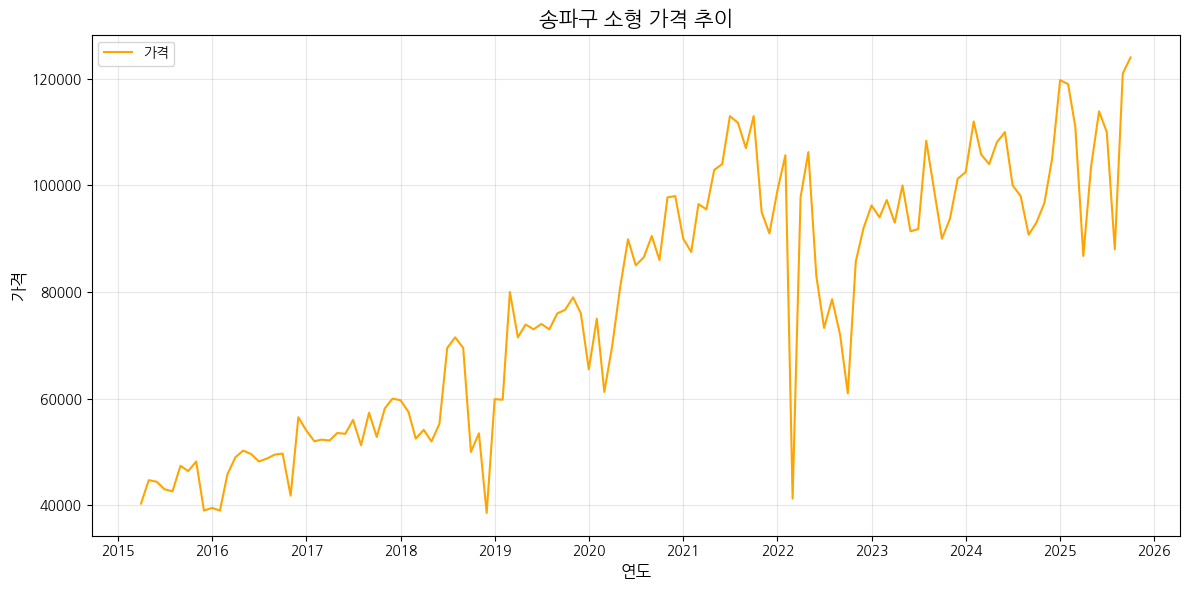

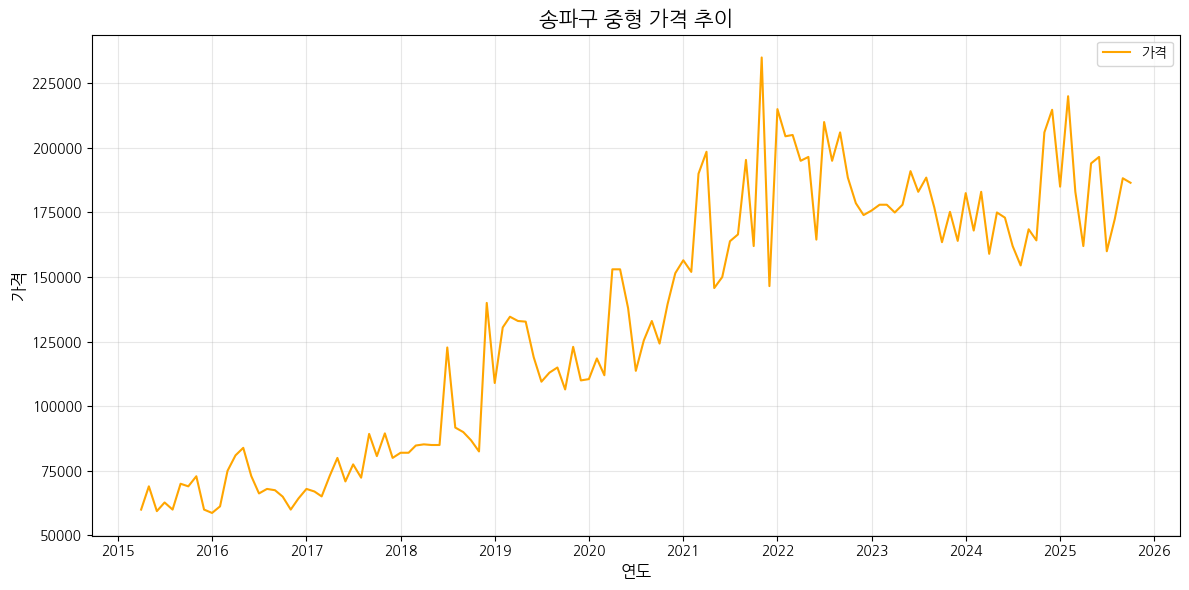

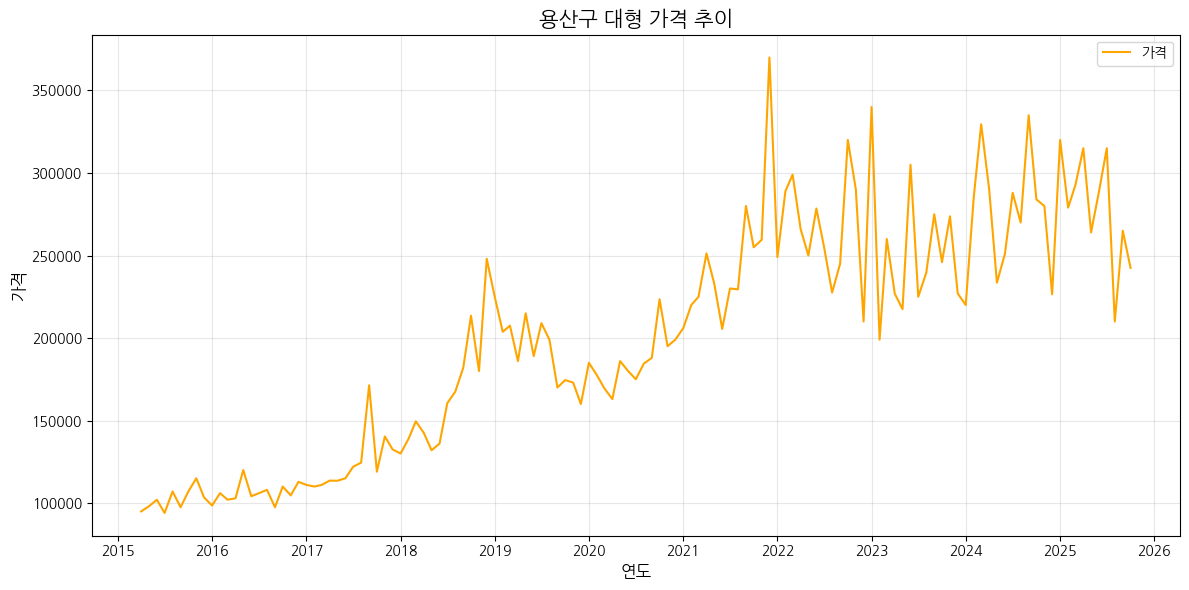

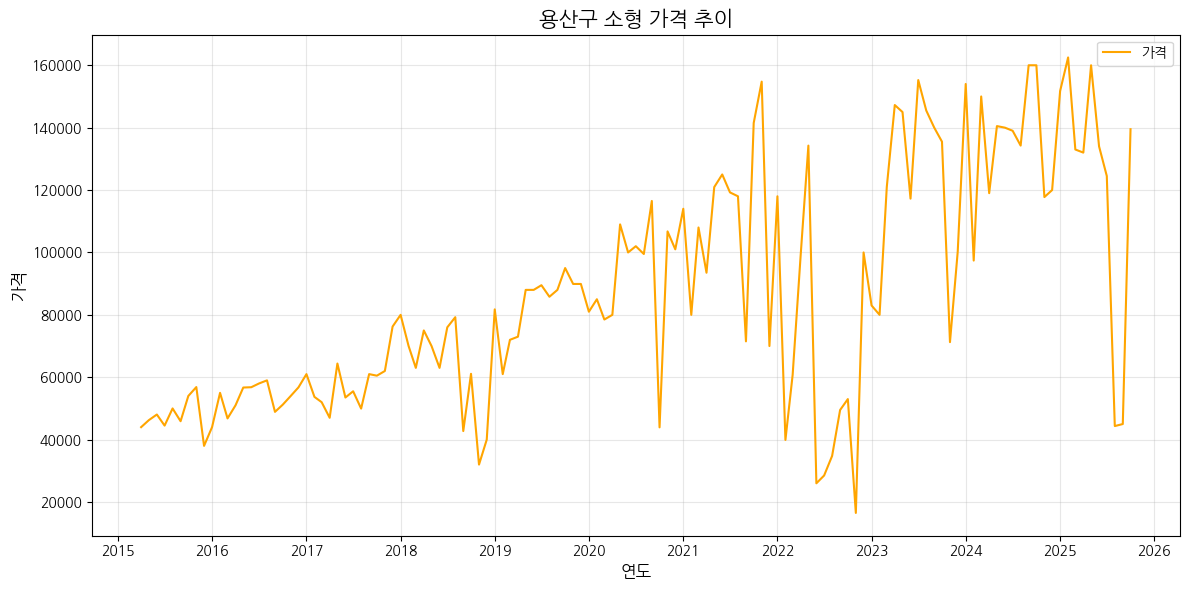

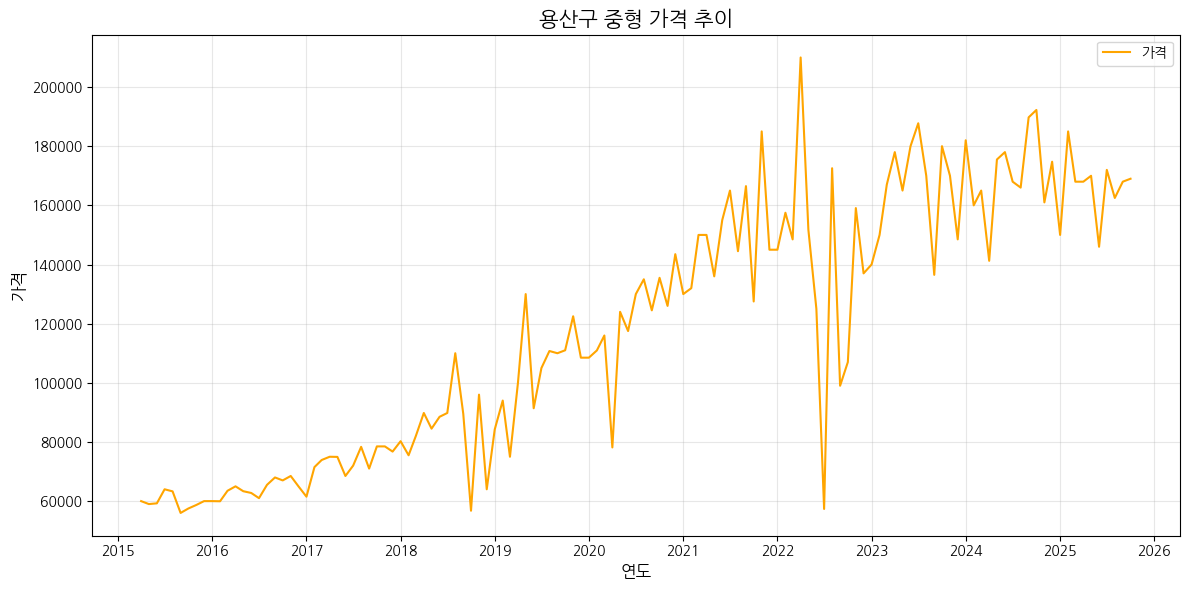

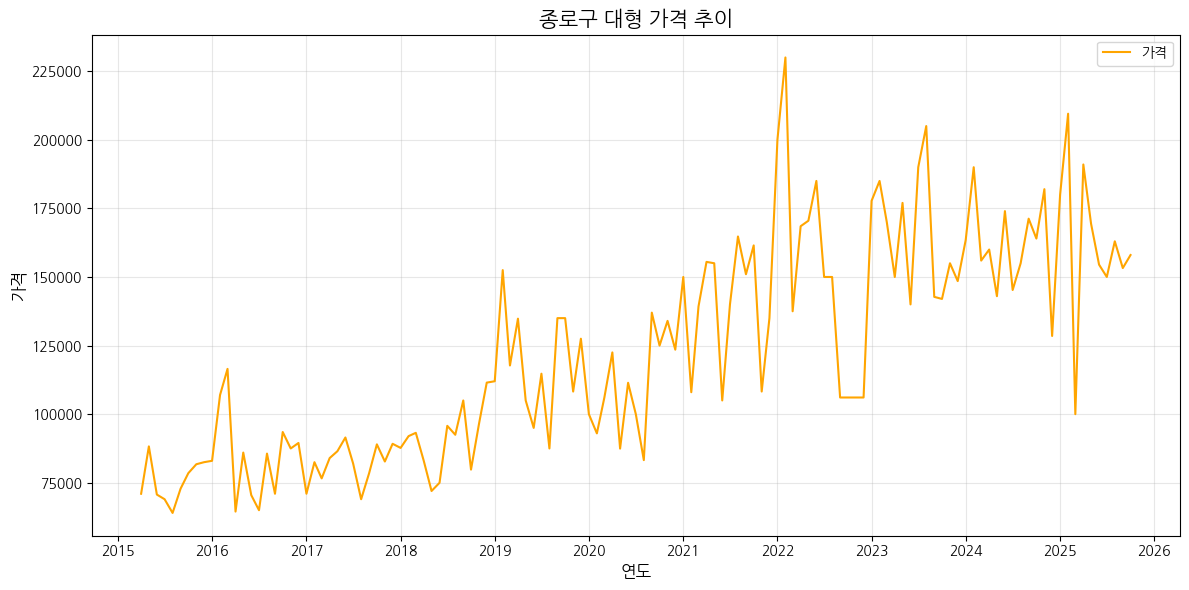

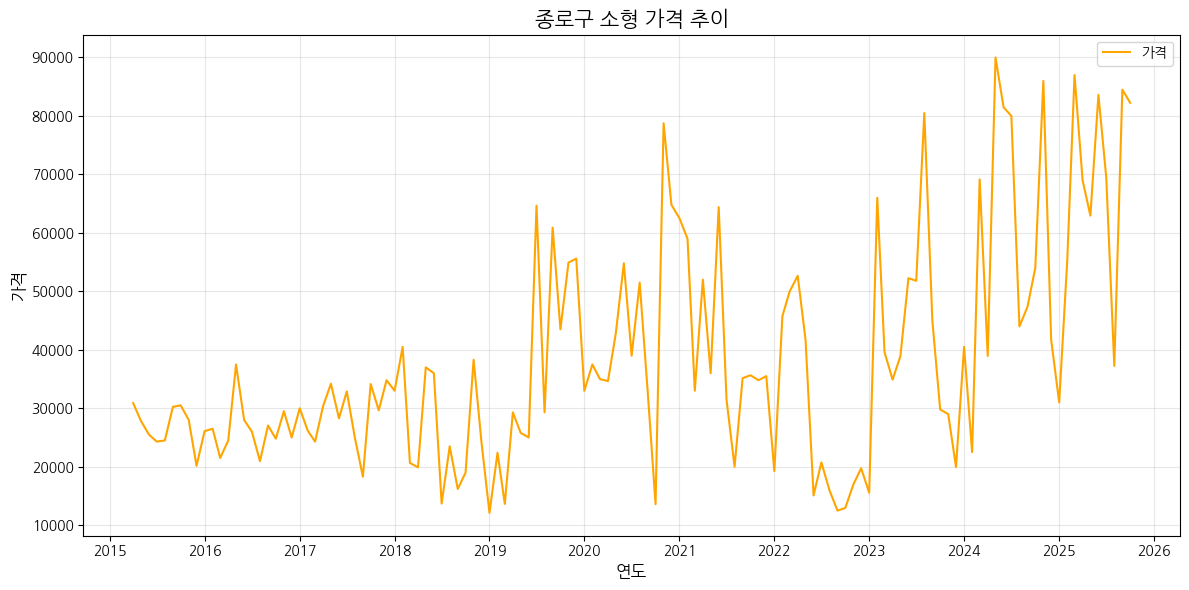

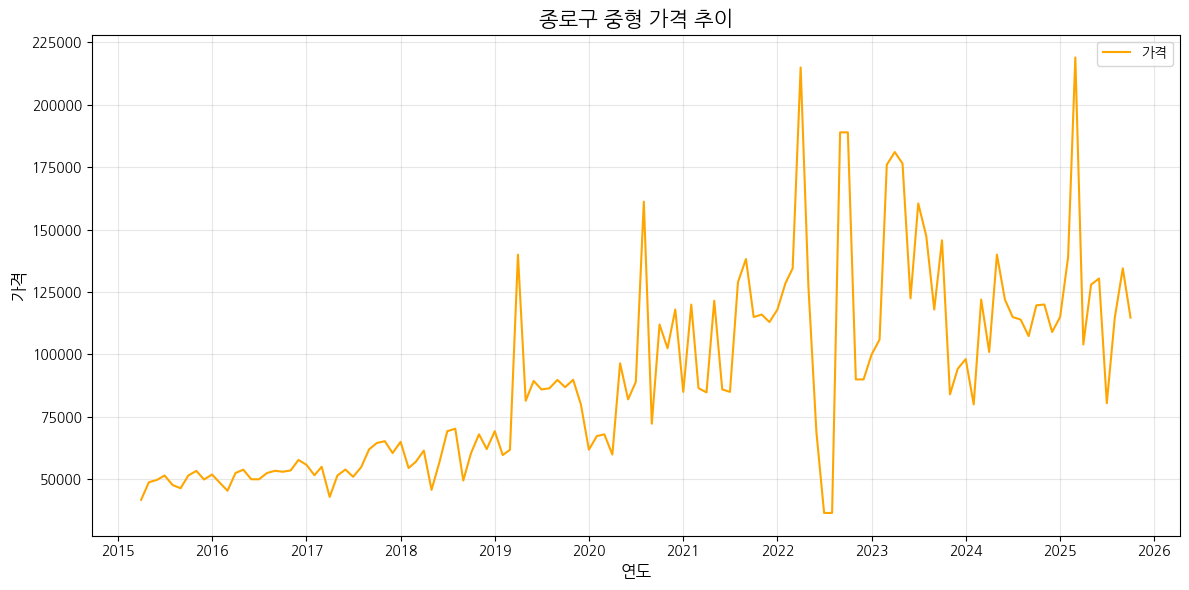

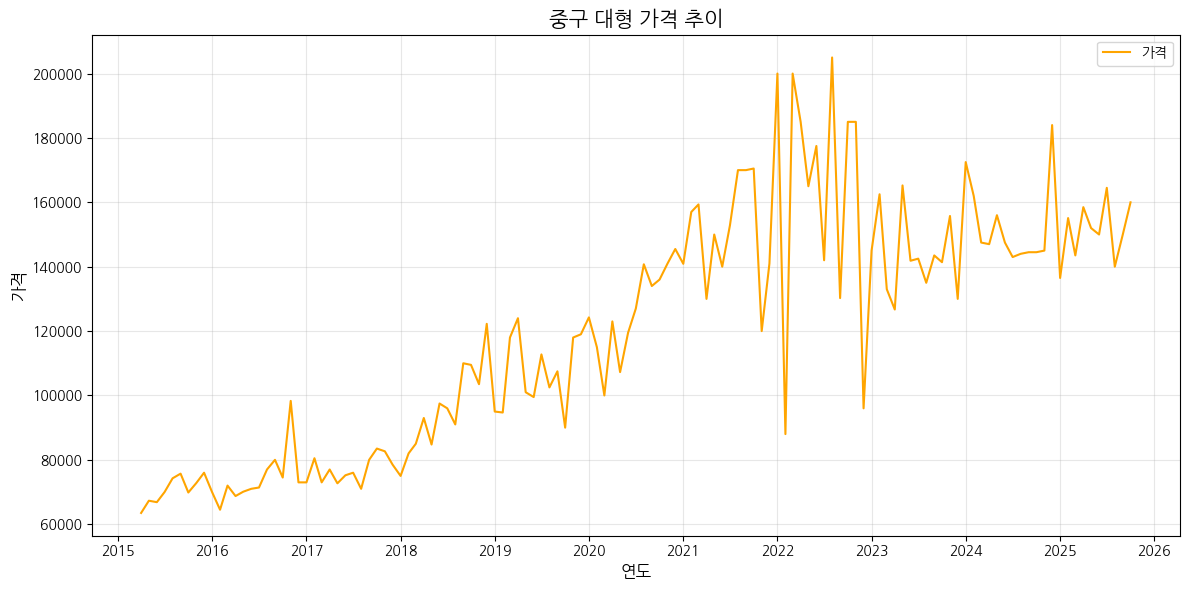

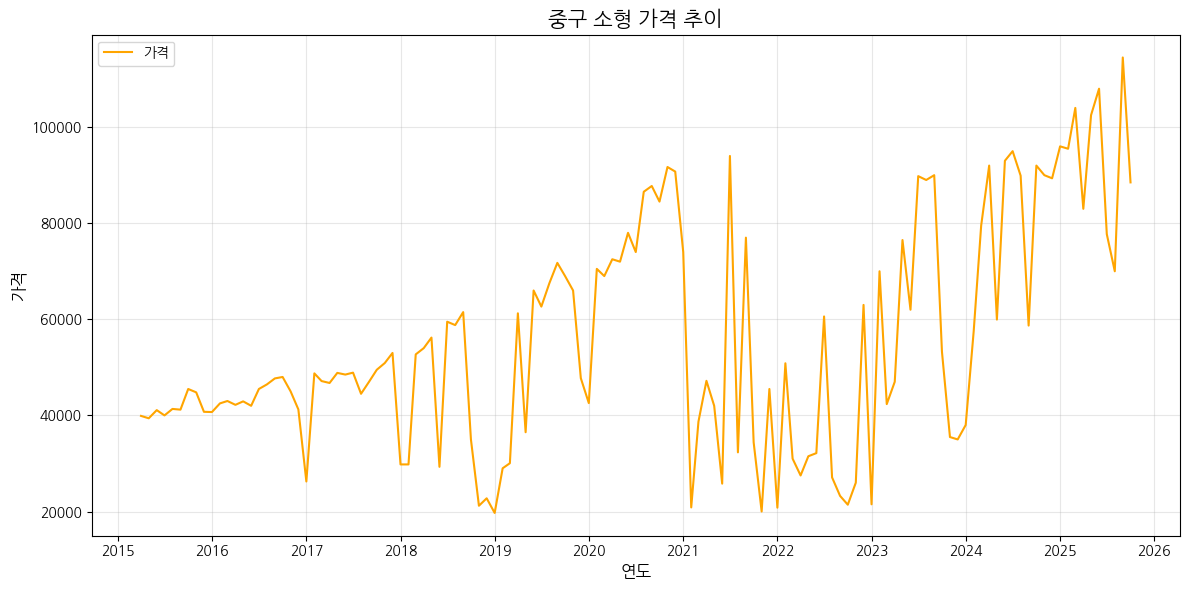

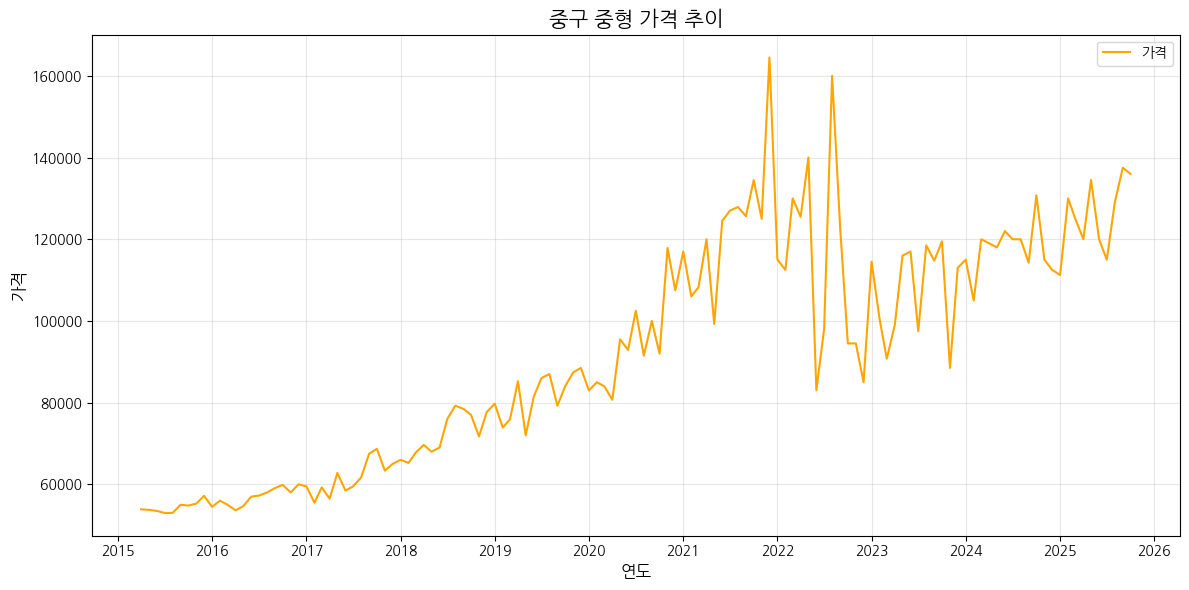

In [131]:
import matplotlib.dates as mdates

import matplotlib.pyplot as plt

# DATE_YM이 datetime인지 보장
read_v1["DATE_YM"] = pd.to_datetime(read_v1["DATE_YM"].astype(str), format="%Y%m")


for STATE in states:
    for SZ in size:
        data = read_v1[(read_v1['구'] == STATE) & (read_v1['SIZE'] == SZ)]
        if data.empty:
            continue

        data = data.sort_values('DATE_YM')

        plt.figure(figsize=(12,6))
        plt.plot(data['DATE_YM'], data['가격'],
                 color='orange', marker='', label='가격')

        ax = plt.gca()
        ax.xaxis.set_major_locator(mdates.YearLocator())
        ax.xaxis.set_major_formatter(DateFormatter('%Y'))

        plt.title(f'{STATE} {SZ} 가격 추이', fontsize=15)
        plt.xlabel('연도', fontsize=12)
        plt.ylabel('가격', fontsize=12)
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()


In [132]:
data['DATE_YM'].dtype

dtype('<M8[ns]')